# Sentiment Analysis

The purpose of this notebook is to work on sentiment analysis, user VADER sentiment analysis of the transcript corpus.  This is using data built in final_dataframe_cleanup.ipynb.

Importing packages:

In [1]:
import nltk
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,10
import pickle

Pickling in corpus:

In [2]:
pwd

'/Users/patrickbovard/Documents/GitHub/presidential_debate_analysis'

In [3]:
with open('Data/cleaned_string_df.pickle', 'rb') as read_file:
    corpus_df = pickle.load(read_file)

In [4]:
corpus_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Year,Speaker_Type,line_length,Election_Result,string
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,100,n/a,good evening welcome first debate among major ...
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992,Independent,74,Loser,think principal separate half million people c...
2,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Governor Clinton, a one minute response.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,3,n/a,one minute response
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992,Democrat,45,Winner,important distinction campaign represent real ...
4,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: President Bush, one minute response, sir.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,4,n/a,one minute response sir


In [5]:
corpus_df.shape

(76452, 10)

## VADER Sentiment Analysis

In order to get a sense of sentiment analysis, I'll be using VADER on the text.

In [6]:
texts = corpus_df['Transcript']

In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/patrickbovard/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Initializing the sentiment analyzer:

In [9]:
sent_analyzer = SentimentIntensityAnalyzer()

In [10]:
corpus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76452 entries, 0 to 76451
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Debate_Name      76452 non-null  object
 1   Transcript       76452 non-null  object
 2   Speaker          76452 non-null  object
 3   Data_Source      76452 non-null  object
 4   Debate_Type      76452 non-null  object
 5   Year             76452 non-null  int64 
 6   Speaker_Type     76452 non-null  object
 7   line_length      76452 non-null  int64 
 8   Election_Result  76452 non-null  object
 9   string           76452 non-null  object
dtypes: int64(2), object(8)
memory usage: 5.8+ MB


Creating a new df to run the analysis on and add the scores to:

In [11]:
sentiment_df = corpus_df.iloc[:, 0:9].copy()

In [12]:
sentiment_df['Negative'] = 0
sentiment_df['Neutral'] = 0
sentiment_df['Positive'] = 0
sentiment_df['Compound'] = 0

Looping through the new df to add the sentiment scores for each document (line) in the corpus:

In [13]:
for i, text in enumerate(sentiment_df['Transcript']):
    sentiment = sent_analyzer.polarity_scores(text)
    sentiment_df.iloc[i, 9] = sentiment['neg']
    sentiment_df.iloc[i, 10] = sentiment['neu']
    sentiment_df.iloc[i, 11] = sentiment['pos']
    sentiment_df.iloc[i, 12] = sentiment['compound']

In [14]:
sentiment_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Year,Speaker_Type,line_length,Election_Result,Negative,Neutral,Positive,Compound
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,100,n/a,0.015,0.875,0.111,0.9647
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992,Independent,74,Loser,0.021,0.941,0.037,0.2617
2,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Governor Clinton, a one minute response.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,3,n/a,0.000,1.000,0.000,0.0000
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992,Democrat,45,Winner,0.000,0.808,0.192,0.9531
4,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: President Bush, one minute response, sir.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,4,n/a,0.000,1.000,0.000,0.0000


## EDA w/ Sentiments

What are some of the most negative lines?

In [15]:
top_10_neg = sentiment_df[(sentiment_df.line_length >= 15) & (sentiment_df.Speaker_Type != 'Moderator/Other')].sort_values(by='Negative', ascending=False).head(10)

In [16]:
for i, line in enumerate(top_10_neg.Transcript):
    print(line)
    print('- {}, {} ({})'.format(top_10_neg.iloc[i].Speaker, top_10_neg.iloc[i].Year, top_10_neg.iloc[i].Speaker_Type))
    print('\n')

WARREN: So let's start by framing the problem the right way. We have a gun violence problem in this country. The mass shootings are terrible, but they get all the headlines. Children die every day on streets, in neighborhoods, on playgrounds. People die from violence, from suicide and domestic abuse. We have a gun violence problem in this country.
- warren, 2019 (Democrat)


Saddam Hussein was a threat because he could have given weapons of mass destruction to terrorist enemies. Sanctions were not working. The United Nations was not effective at removing Saddam Hussein.
- president bush, 2004 (Republican)


The problem is, these policies of preemption license a war. Preemption, by virtue of international law, is illegal. Our president has already violated international law. The war in Iraq is illegal. Even planning for the war against Iran is illegal.
- kucinich, 2007 (Democrat)


BUSH: In this case when you murder somebody it's hate, Jim. The crime is hate. And they got the ultimate p

What about Positive?

In [17]:
top_10_pos = sentiment_df[(sentiment_df.line_length >= 15) & (sentiment_df.Speaker_Type != 'Moderator/Other')].sort_values(by='Positive', ascending=False).head(10)

In [18]:
for i, line in enumerate(top_10_pos.Transcript):
    print(line)
    print('- {}, {} ({})'.format(top_10_pos.iloc[i].Speaker, top_10_pos.iloc[i].Year, top_10_pos.iloc[i].Speaker_Type))
    print('\n')

PAWLENTY: God has greatly blessed America, but with great blessing comes responsibility. And if we don't fiercely protect our most precious blessing, freedom, we may lose it forever.
- pawlenty, 2011 (Republican)


I will not only restore the Constitution, but I want a new national security doctrine, strength through peace, that will make us safer, because the neo kind approach has made America less safe and more vulnerable.
- kucinich, 2007 (Democrat)


Please join me in this campaign. Please come and make it clear that America's best days are still ahead. Thank you very much. [applause]
- clinton, 2015 (Democrat)


TRUMP: Well, I consider her statement about my children to be a very nice compliment. I don't know if it was meant to be a compliment, but it is a great—I'm very proud of my children. And they've done a wonderful job, and they've been wonderful, wonderful kids. So I consider that a compliment.
- trump, 2016 (Republican)


MR. MONDALE: Mr. President, I accept your commitmen

Has the sentiment for each party stayed relatively similar over time?

In [19]:
sent_over_time = sentiment_df[sentiment_df.line_length >= 0].groupby([sentiment_df.Year, sentiment_df.Speaker_Type, sentiment_df.Debate_Type]).agg({'Transcript':'count','Negative':'mean', 'Positive':'mean', 'Neutral':'mean'}).reset_index()

In [20]:
sent_over_time.head()

,Year,Speaker_Type,Debate_Type,Transcript,Negative,Positive,Neutral
0,1960,Democrat,General-President,59,0.062322,0.108407,0.829339
1,1960,Moderator/Other,General-President,152,0.018230,0.045822,0.935961
2,1960,Republican,General-President,45,0.052311,0.114222,0.833422
3,1976,Democrat,General-President,58,0.070207,0.097103,0.832724
4,1976,Moderator/Other,General-President,159,0.024755,0.056013,0.919264


In [21]:
types = ['Democrat', 'Republican'] 

In [22]:
sentiments = ['Negative', 'Positive', 'Neutral']

Using Subplots:

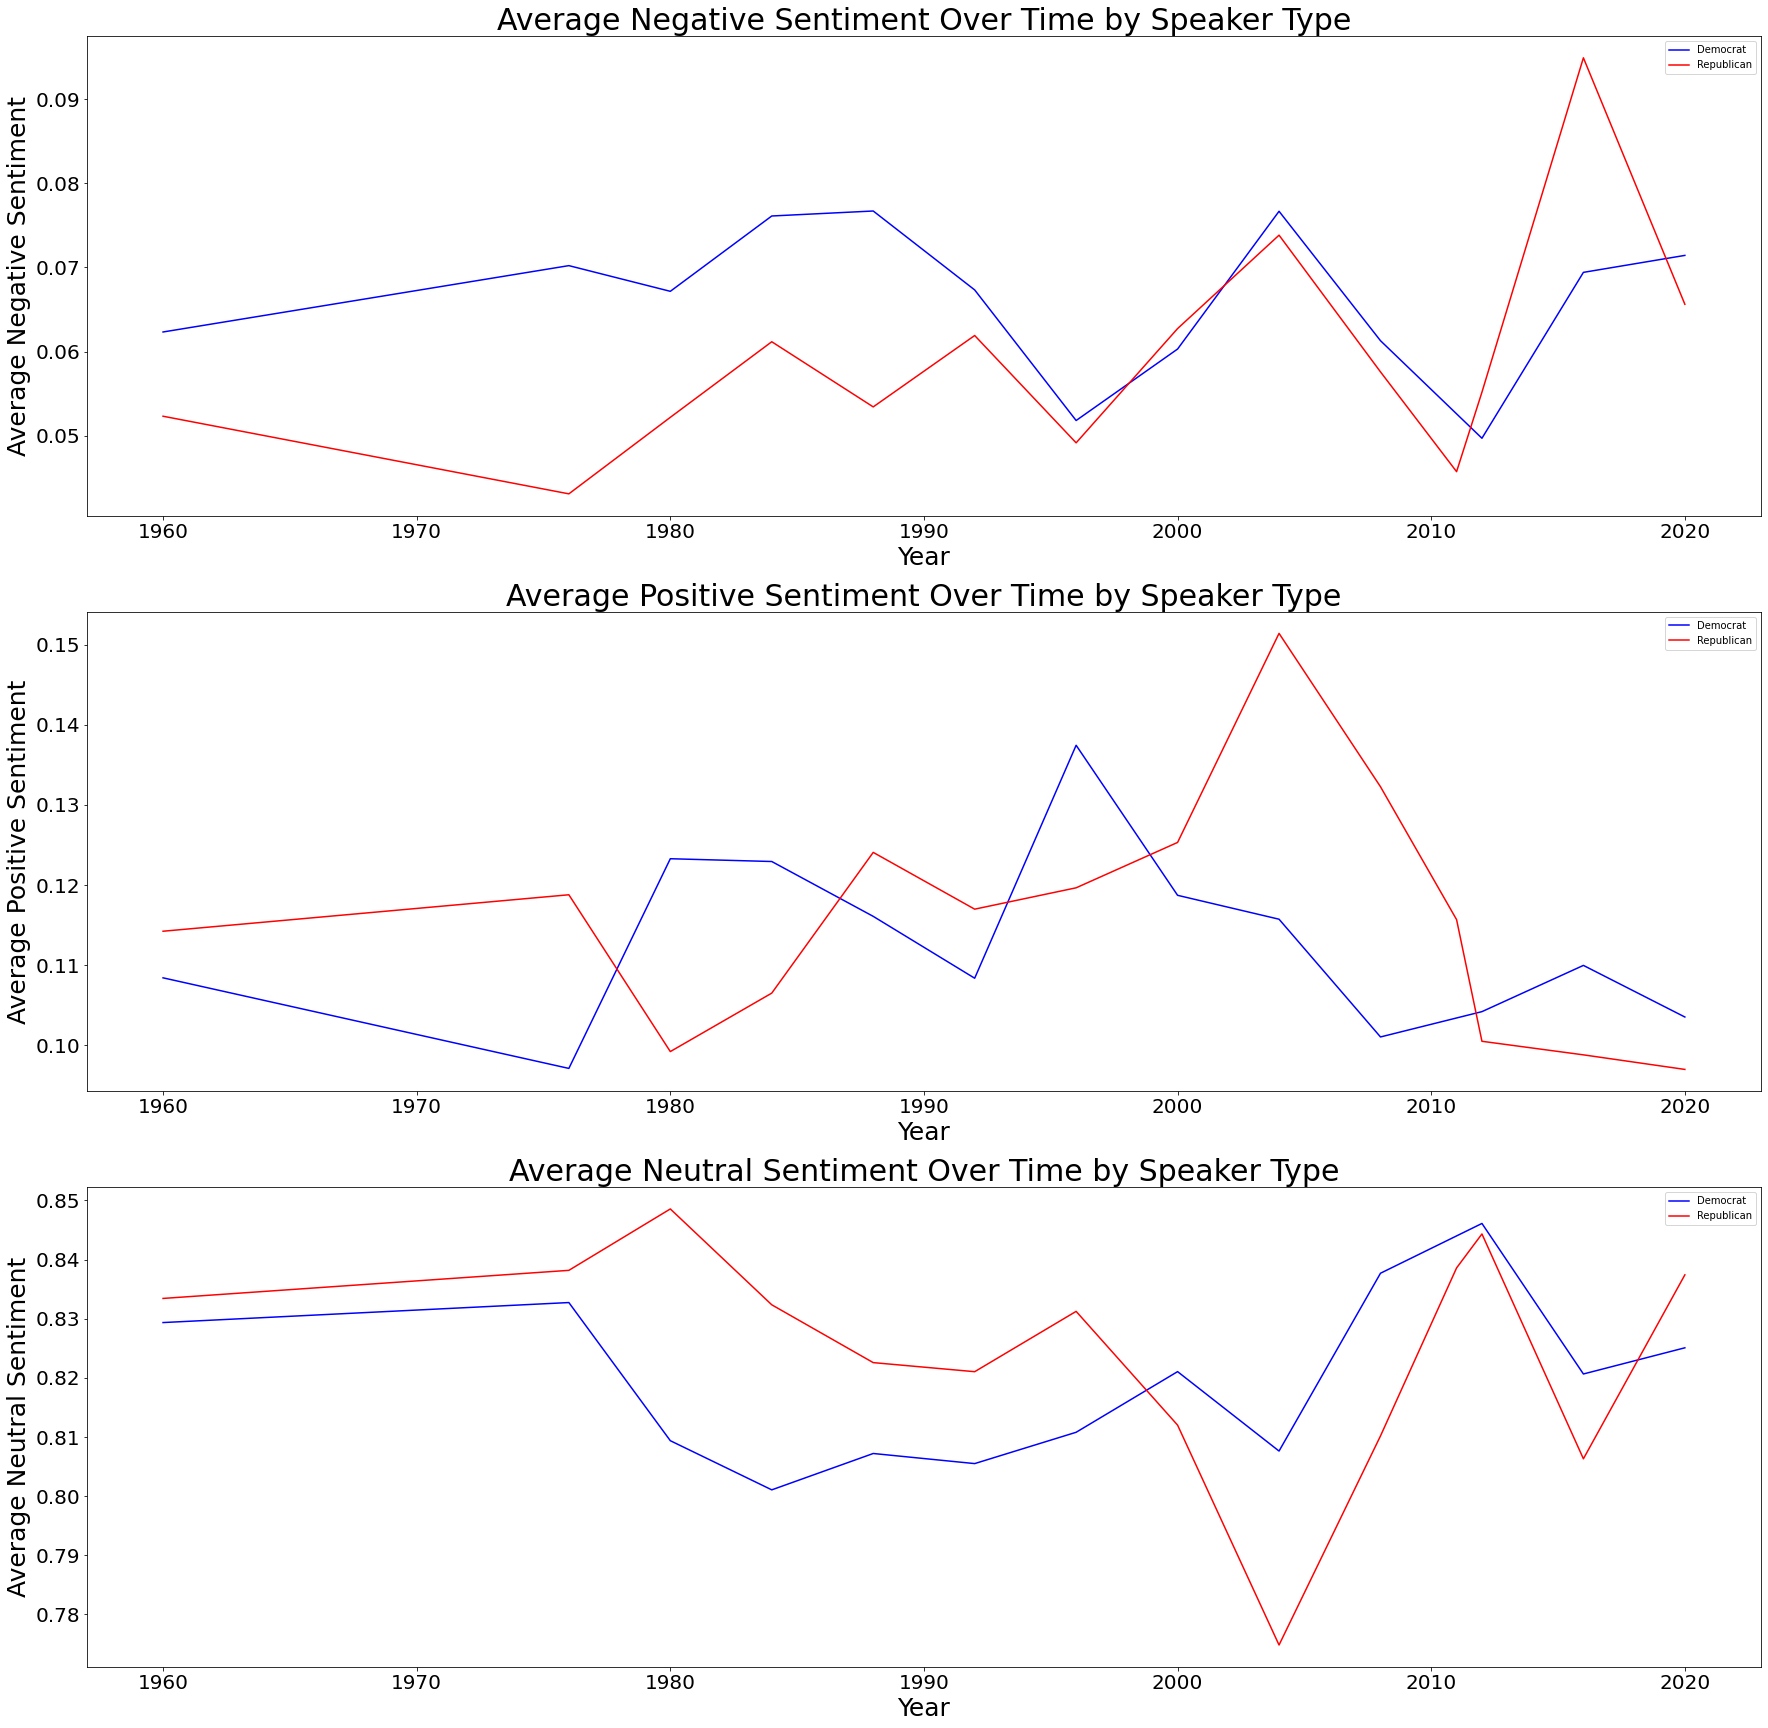

In [23]:
legend = []
plt.subplots(3, 1,figsize=(30,30))
for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(3,1,i)
    for Speaker_Type in types:
        x = sent_over_time[(sent_over_time.Debate_Type == 'General-President') & (sent_over_time.iloc[:, 1] == Speaker_Type)].iloc[:, 0]
        y = sent_over_time[(sent_over_time.Debate_Type == 'General-President') & (sent_over_time.iloc[:, 1] == Speaker_Type)].loc[:, sentiment]
        legend.append(type)
        if Speaker_Type == 'Republican':
            color = 'r'
        elif Speaker_Type == 'Democrat':
            color = 'b'
        else:
            color = 'g'
        plt.plot(x,y, color)
    plt.xlabel('Year', size=25)
    plt.ylabel('Average {} Sentiment'.format(sentiment), size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title('Average {} Sentiment Over Time by Speaker Type'.format(sentiment), size=30)
    plt.legend(('Democrat', 'Republican'))

Who are the most positive and negative candidates?

In [24]:
candidate_sents = sentiment_df[(sentiment_df.line_length >= 0) & ((sentiment_df.Speaker_Type == 'Republican')|(sentiment_df.Speaker_Type == 'Democrat'))].groupby([sentiment_df.Speaker]).agg({'Transcript':'count','Negative':'mean', 'Positive':'mean', 'Neutral':'mean'}).reset_index()

Negative:

In [25]:
candidate_sents[candidate_sents.Transcript >= 20].sort_values(by='Negative', ascending=False).head(10)

,Speaker,Transcript,Negative,Positive,Neutral
42,gravel,222,0.134770,0.093419,0.771815
33,gabbard,108,0.099537,0.113917,0.786528
95,swalwell,35,0.087600,0.027114,0.885286
71,paul,1651,0.084394,0.087636,0.827973
68,orrin hatch,24,0.083583,0.105167,0.811292
8,booker,219,0.079982,0.119370,0.800621
41,graham,305,0.079630,0.113823,0.806564
57,kerry,89,0.076854,0.121910,0.801292
27,dukakis,116,0.076698,0.116078,0.807181
90,senator kerry,273,0.076667,0.115722,0.807593


Positive:

In [26]:
candidate_sents[candidate_sents.Transcript >= 20].sort_values(by='Positive', ascending=False).head(10)

,Speaker,Transcript,Negative,Positive,Neutral
76,president bush,297,0.073869,0.150862,0.775259
61,lieberman,127,0.069370,0.149441,0.781205
69,palin,147,0.049714,0.138605,0.811714
62,mccain,2126,0.059509,0.138087,0.802408
11,bush,1591,0.058004,0.134338,0.807661
70,pataki,245,0.072306,0.134261,0.793465
31,forbes,426,0.050951,0.133228,0.815796
52,john mccain,21,0.047095,0.127571,0.825429
74,pence,359,0.063209,0.127159,0.809624
3,bauer,409,0.052636,0.126968,0.820374


Negative:

In [27]:
candidate_sents[candidate_sents.Transcript >= 20].sort_values(by='Neutral', ascending=False).head(10)

,Speaker,Transcript,Negative,Positive,Neutral
50,j. king,37,0.007000,0.065162,0.927784
95,swalwell,35,0.087600,0.027114,0.885286
5,bentsen,32,0.049469,0.087656,0.863000
75,perry,493,0.045485,0.091738,0.862797
9,bradley,856,0.051279,0.088806,0.859905
25,delaney,95,0.045053,0.096474,0.858484
99,walker,94,0.051138,0.092543,0.856319
91,senator obama,134,0.050254,0.094873,0.854799
36,gillibrand,99,0.063152,0.083111,0.853717
59,klobuchar,591,0.034865,0.111866,0.853269


### What about sentiment for winning or losing?

For this, I'll add a column for winner/vs non-winner of a particular election.

In [28]:
sentiment_df

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Year,Speaker_Type,line_length,Election_Result,Negative,Neutral,Positive,Compound
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,100,n/a,0.015,0.875,0.111,0.9647
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992,Independent,74,Loser,0.021,0.941,0.037,0.2617
2,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Governor Clinton, a one minute response.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,3,n/a,0.000,1.000,0.000,0.0000
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992,Democrat,45,Winner,0.000,0.808,0.192,0.9531
4,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: President Bush, one minute response, sir.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,4,n/a,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76447,Remarks in a Town Hall Meeting with George Ste...,"Look, I'm going to abide by what the commissio...",biden,American Presidency Project,General-President,2020,Democrat,21,Winner,0.022,0.943,0.034,0.1724
76448,Remarks in a Town Hall Meeting with George Ste...,"So, whatever rules they set, I and -- I'm conf...",biden,American Presidency Project,General-President,2020,Democrat,18,Winner,0.036,0.817,0.147,0.6808
76449,Remarks in a Town Hall Meeting with George Ste...,STEPHANOPOULOS: But you expect to be there?,stephanopoulos,American Presidency Project,General-President,2020,Moderator/Other,1,n/a,0.000,1.000,0.000,0.0000
76450,Remarks in a Town Hall Meeting with George Ste...,BIDEN: I expect to be there.,biden,American Presidency Project,General-President,2020,Democrat,1,Winner,0.000,1.000,0.000,0.0000


Saving this dataframe as a CSV as well, to work with in Tableau:

In [57]:
sentiment_df.to_csv('./Data/sentiment_data.csv', index=False)

Running filters:

In [29]:
result_sent_over_time = sentiment_df[sentiment_df.line_length >= 0].groupby([sentiment_df.Year, sentiment_df.Debate_Type, sentiment_df.Election_Result]).agg({'Negative':'mean', 'Positive':'mean', 'Neutral':'mean'}).reset_index()

In [30]:
result_sent_over_time.head()

,Year,Debate_Type,Election_Result,Negative,Positive,Neutral
0,1960,General-President,Loser,0.051980,0.108824,0.839216
1,1960,General-President,Winner,0.063774,0.112943,0.823302
2,1960,General-President,n/a,0.018230,0.045822,0.935961
3,1976,General-President,Loser,0.043088,0.118772,0.838175
4,1976,General-President,Winner,0.070207,0.097103,0.832724


Plotting out by election type, over time:

General Election (President):

In [31]:
results = ['Winner', 'Loser'] 

In [32]:
sentiments = ['Negative', 'Positive', 'Neutral']

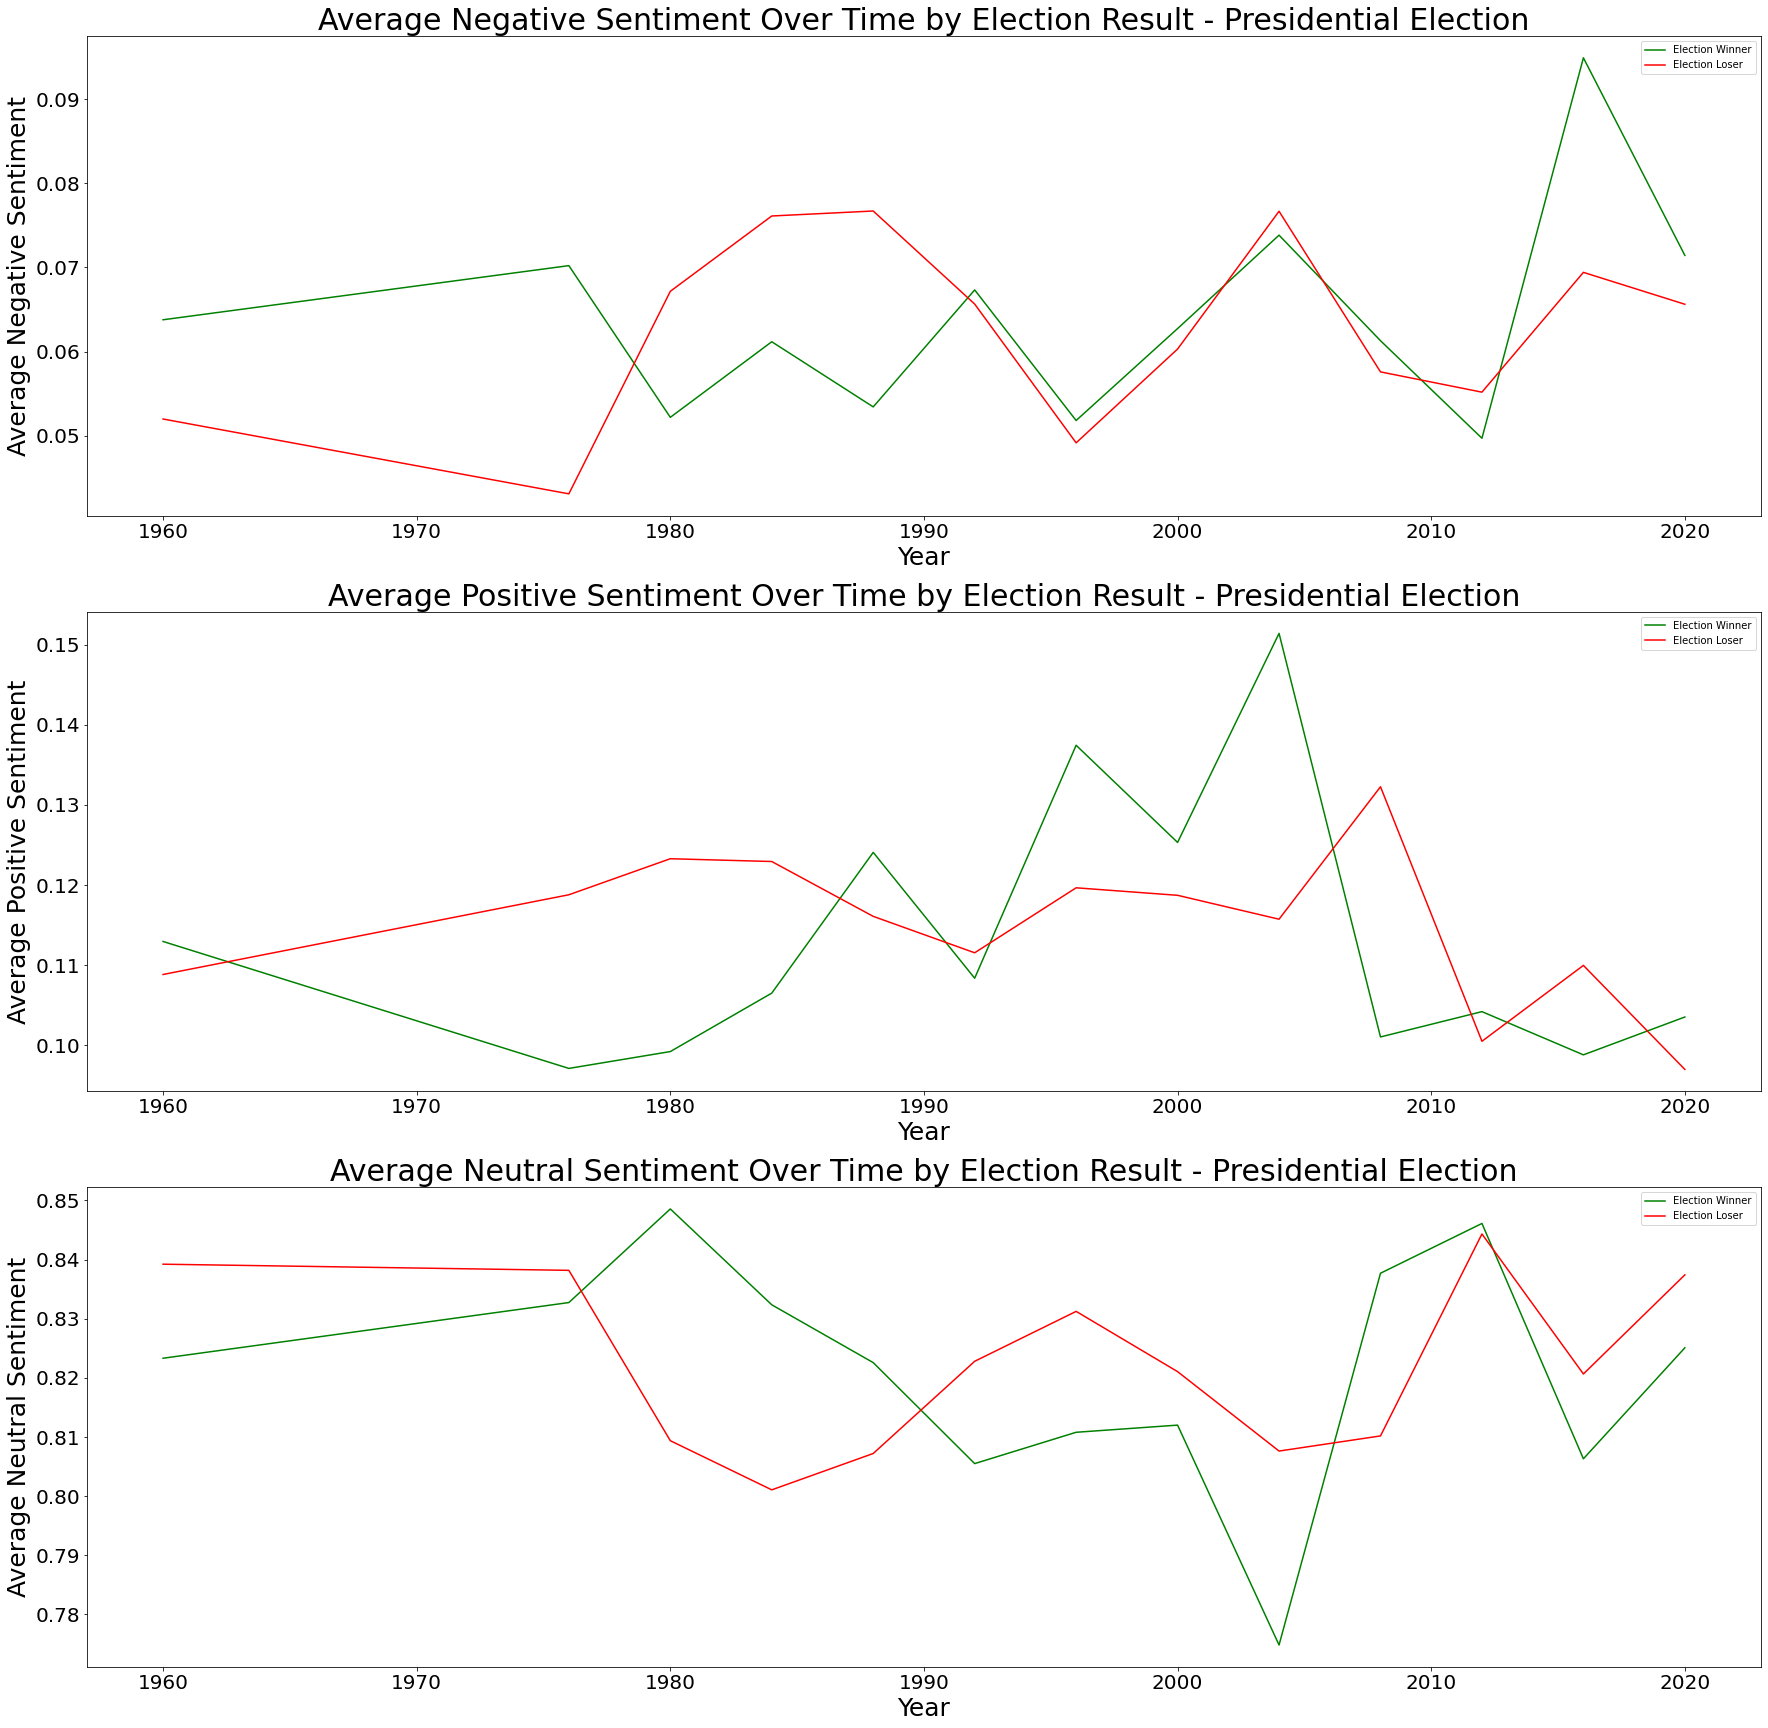

In [33]:
legend = []
plt.subplots(3, 1,figsize=(30,30))
for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(3,1,i)
    for result in results:
        x = result_sent_over_time[(result_sent_over_time.Debate_Type == 'General-President') & (result_sent_over_time.iloc[:, 2] == result)].iloc[:, 0]
        y = result_sent_over_time[(result_sent_over_time.Debate_Type == 'General-President') & (result_sent_over_time.iloc[:, 2] == result)].loc[:, sentiment]
        legend.append(type)
        if result == 'Winner':
            color = 'g'
        else:
            color = 'r'
        plt.plot(x,y, color)
    plt.xlabel('Year', size=25)
    plt.ylabel('Average {} Sentiment'.format(sentiment), size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title('Average {} Sentiment Over Time by Election Result - Presidential Election'.format(sentiment), size=30)
    plt.legend(('Election Winner', 'Election Loser'))

Republican Primaries:

In [34]:
results = ['Winner', 'Loser'] 

In [35]:
sentiments = ['Negative', 'Positive', 'Neutral']

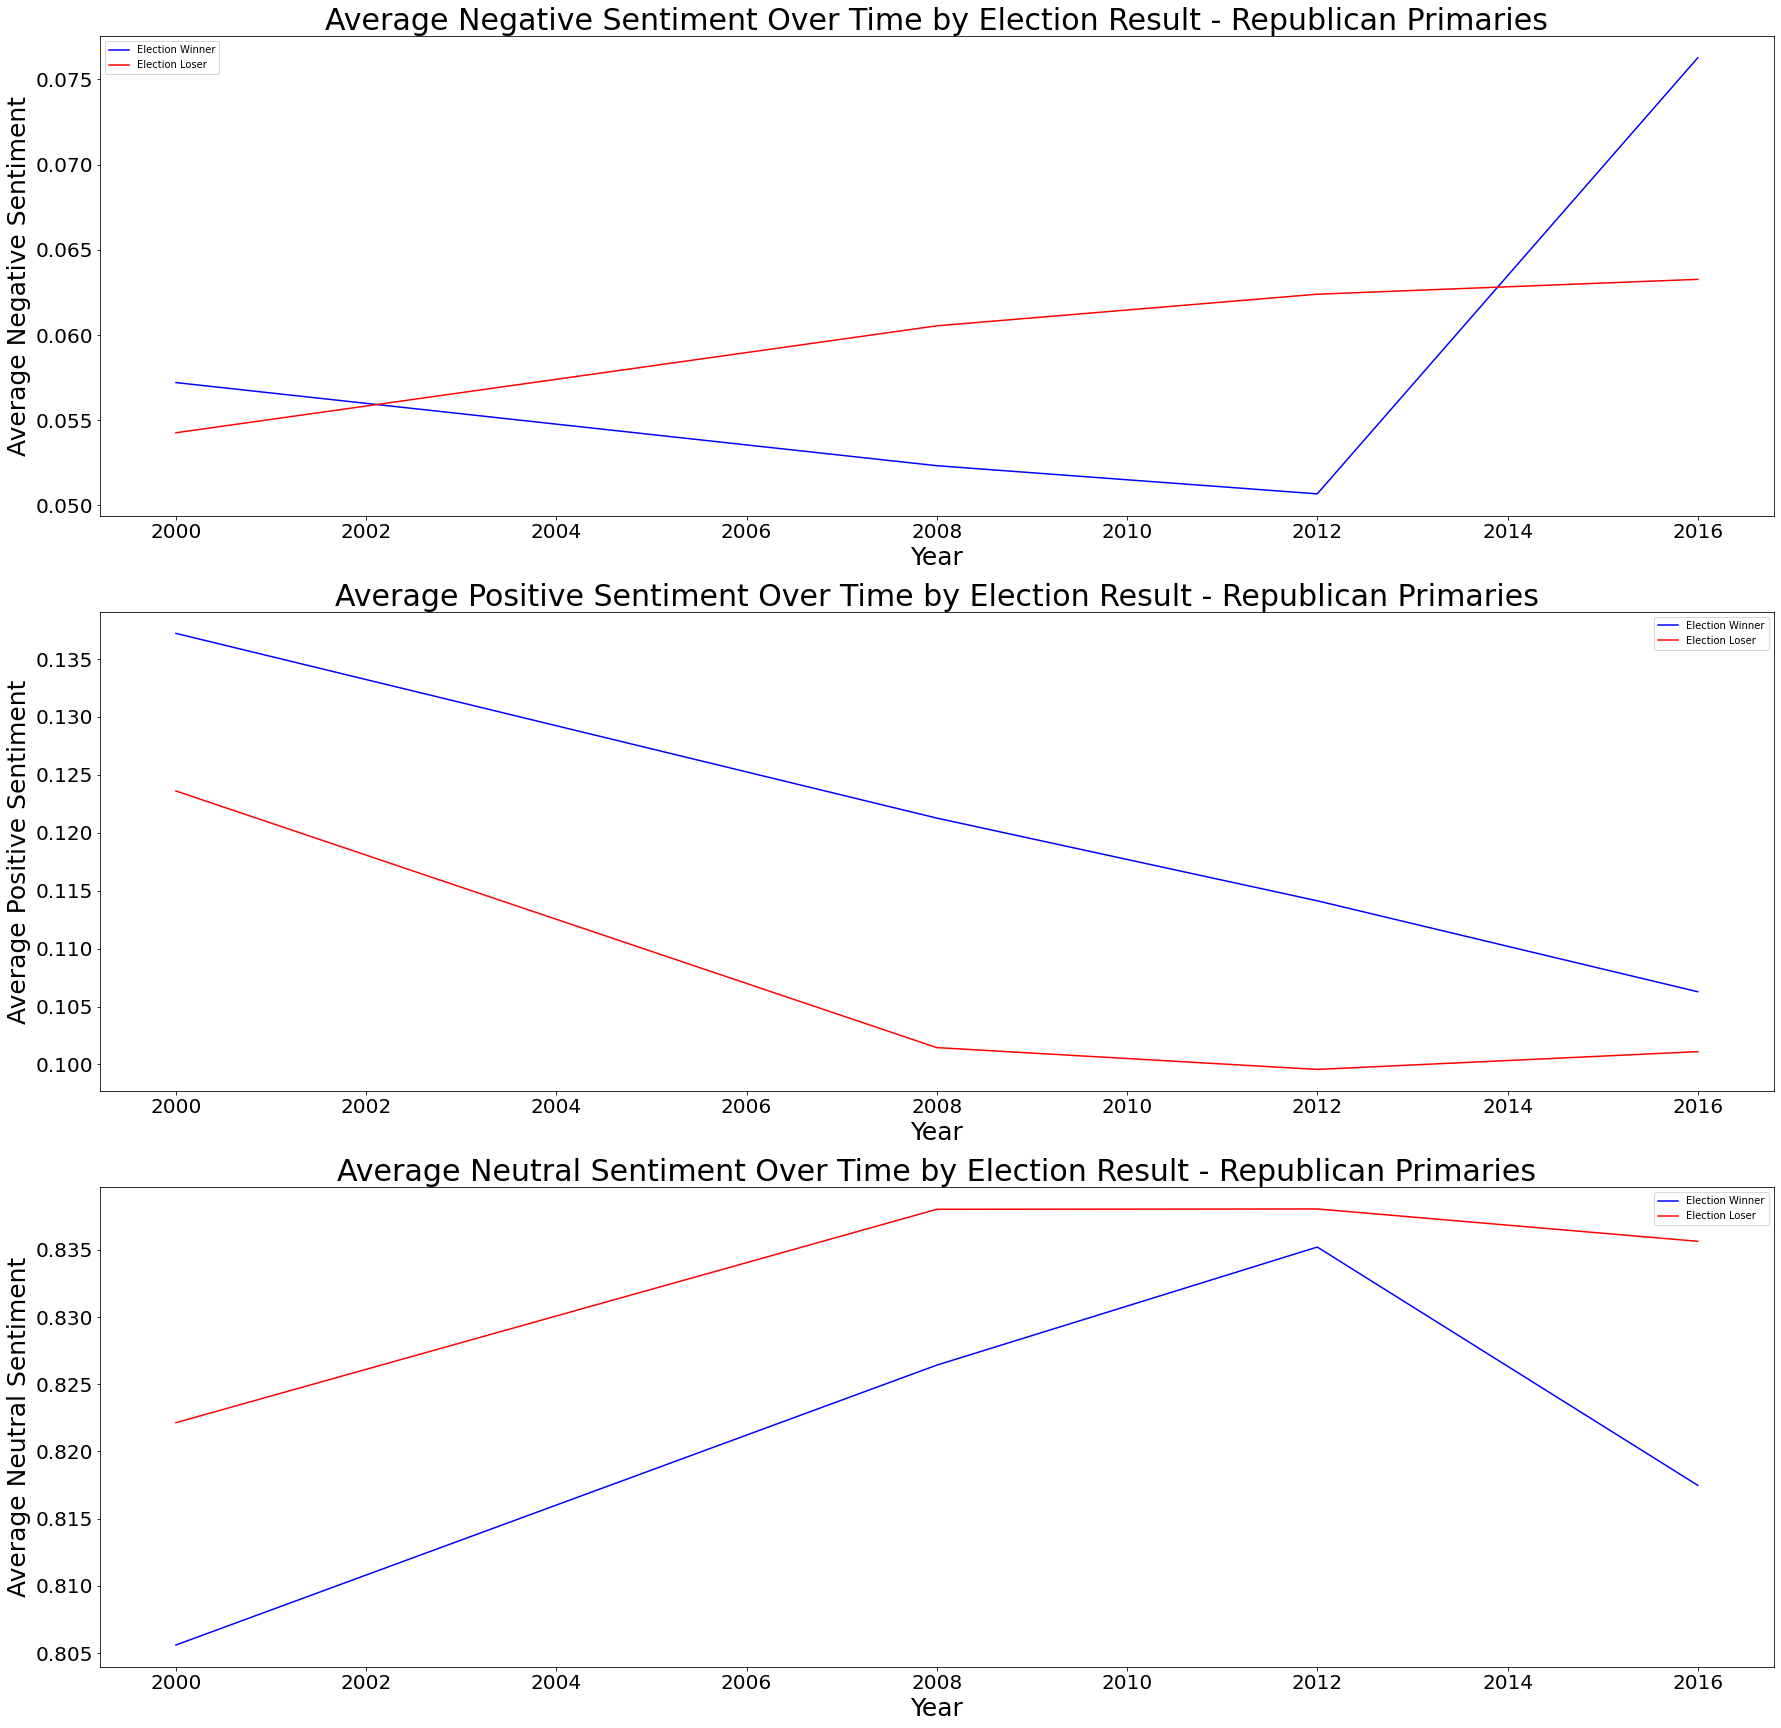

In [36]:
legend = []
plt.subplots(3, 1,figsize=(30,30))
for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(3,1,i)
    for result in results:
        x = result_sent_over_time[(result_sent_over_time.Debate_Type == 'Primary-Republican') & (result_sent_over_time.iloc[:, 2] == result)].iloc[:, 0]
        y = result_sent_over_time[(result_sent_over_time.Debate_Type == 'Primary-Republican') & (result_sent_over_time.iloc[:, 2] == result)].loc[:, sentiment]
        legend.append(type)
        if result == 'Winner':
            color = 'b'
        else:
            color = 'r'
        plt.plot(x,y, color)
    plt.xlabel('Year', size=25)
    plt.ylabel('Average {} Sentiment'.format(sentiment), size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title('Average {} Sentiment Over Time by Election Result - Republican Primaries'.format(sentiment), size=30)
    plt.legend(('Election Winner', 'Election Loser'))

Democrat Primaries:

In [37]:
results = ['Winner', 'Loser'] 

In [38]:
sentiments = ['Negative', 'Positive', 'Neutral']

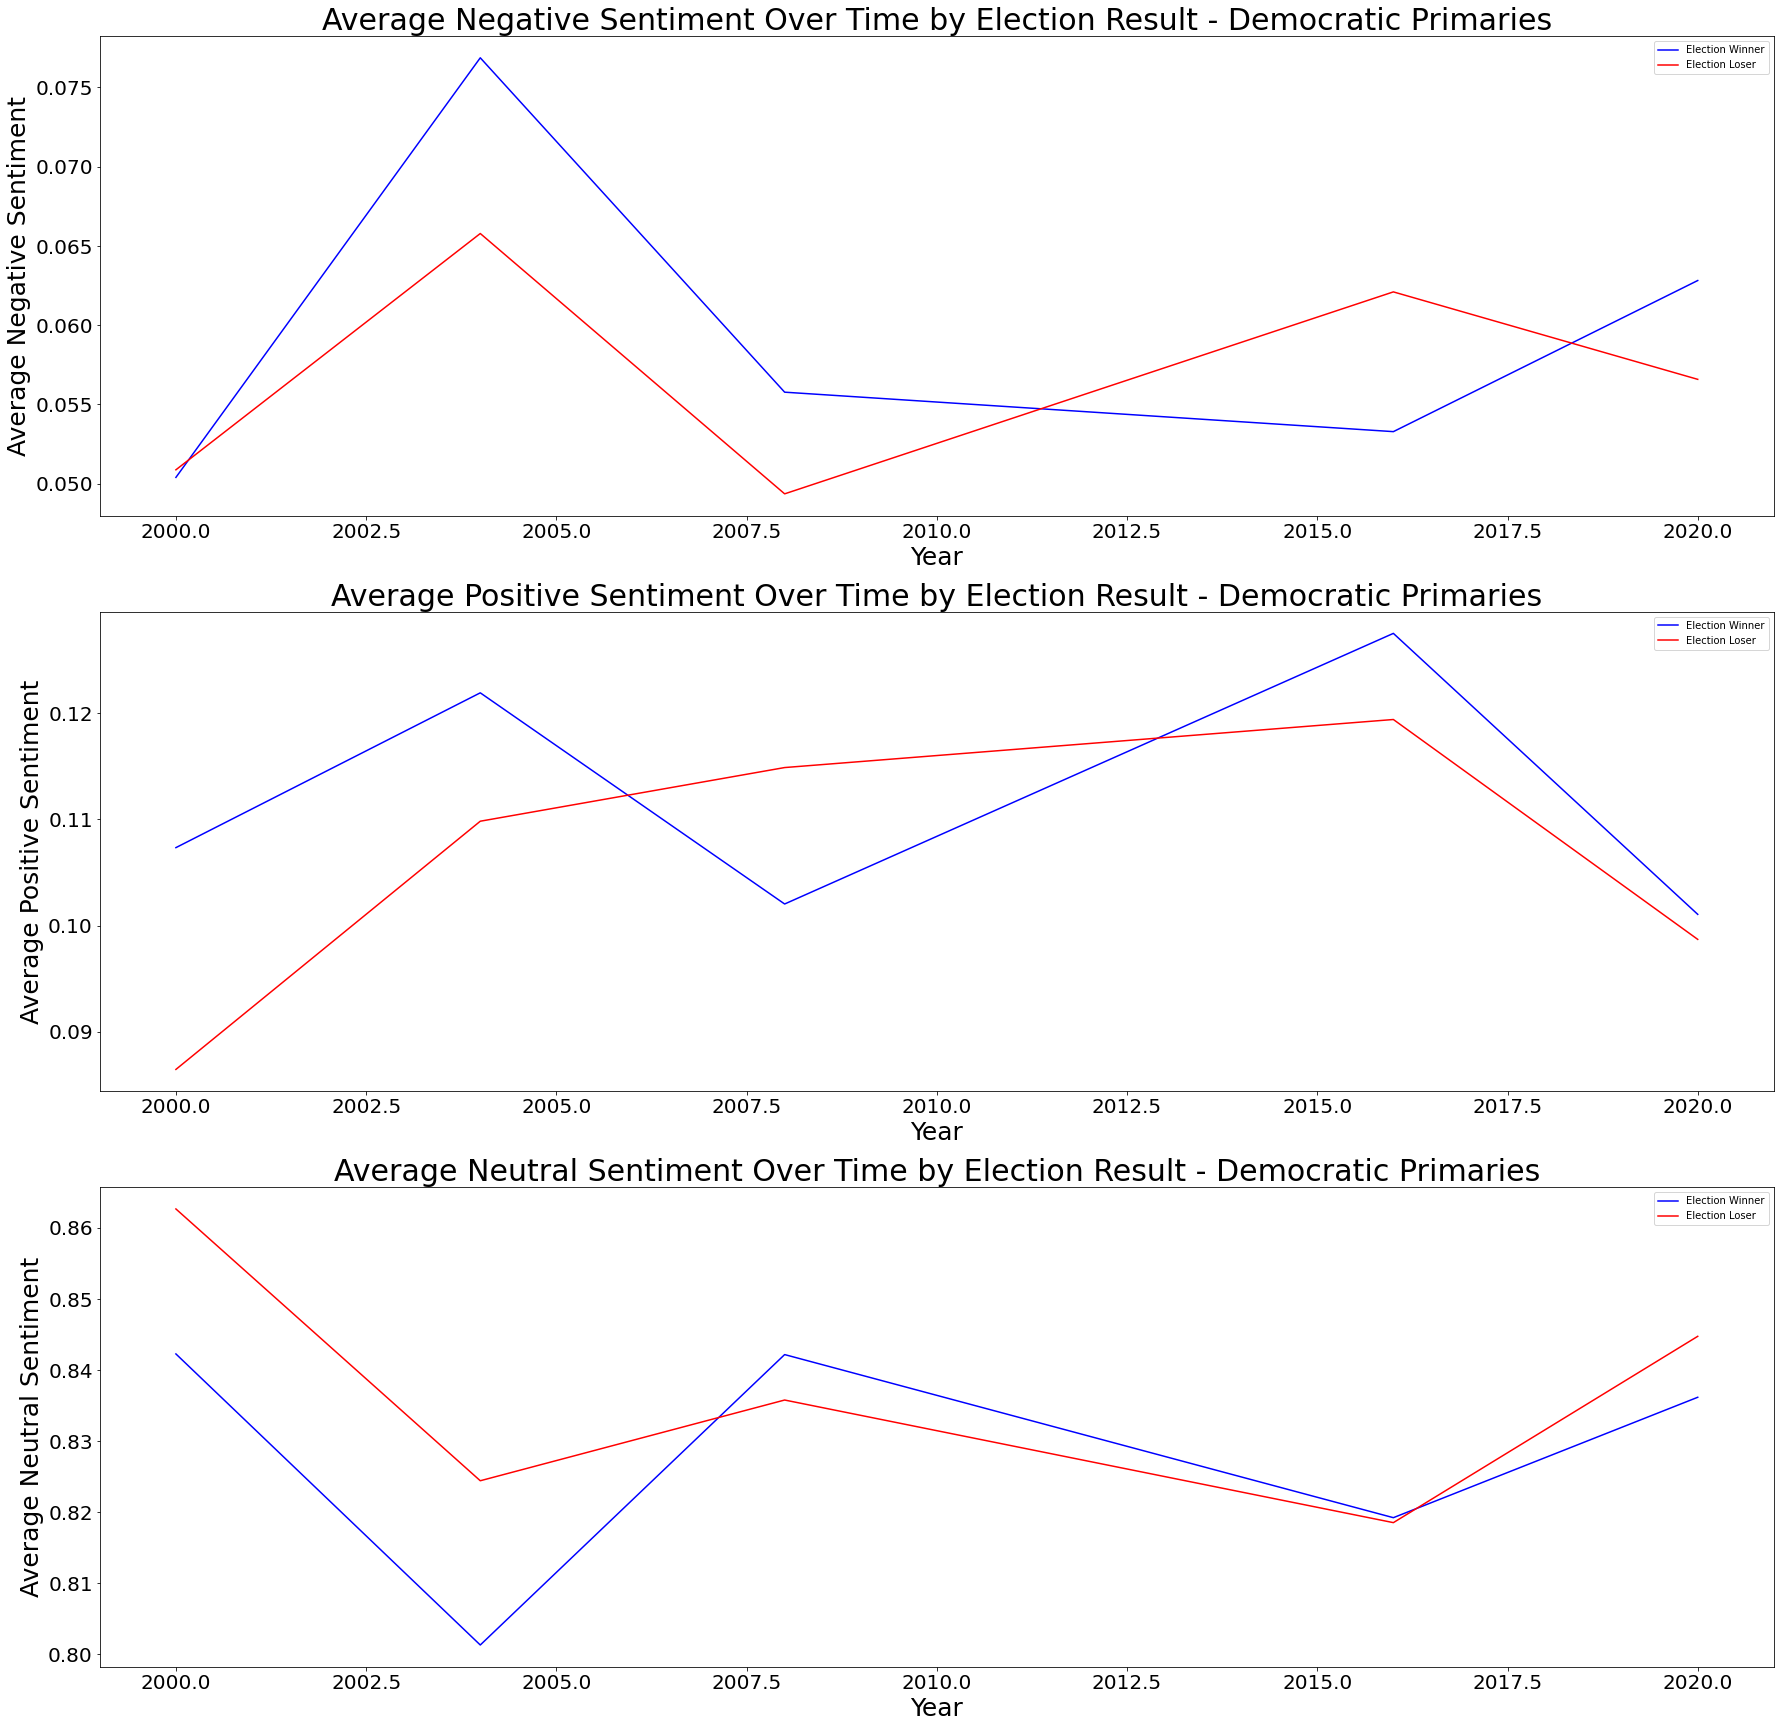

In [39]:
legend = []
plt.subplots(3, 1,figsize=(30,30))
for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(3,1,i)
    for result in results:
        x = result_sent_over_time[(result_sent_over_time.Debate_Type == 'Primary-Democrat') & (result_sent_over_time.iloc[:, 2] == result)].iloc[:, 0]
        y = result_sent_over_time[(result_sent_over_time.Debate_Type == 'Primary-Democrat') & (result_sent_over_time.iloc[:, 2] == result)].loc[:, sentiment]
        legend.append(type)
        if result == 'Winner':
            color = 'b'
        else:
            color = 'r'
        plt.plot(x,y, color)
    plt.xlabel('Year', size=25)
    plt.ylabel('Average {} Sentiment'.format(sentiment), size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title('Average {} Sentiment Over Time by Election Result - Democratic Primaries'.format(sentiment), size=30)
    plt.legend(('Election Winner', 'Election Loser'))